# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
data=pd.read_csv('indian_liver_patient.csv')
data.columns=('age', 'gender', 'total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase', 'alamine_aminotransferase', 'aspartate_aminotransferase', 'total_protiens', 'albumin', 'albumin_and_globulin_ratio', 'dataset')
data.tail()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
# In the begining of work, check dataset for empty sheelds and null values and prepare dataframe for work
data.isnull().sum()
# data.shape

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    4
dataset                       0
dtype: int64

In [4]:
# We see that column 'Albumin_and_Globulin_Ratio' has the null values, let`s fill it with mean values of this column
data['albumin_and_globulin_ratio'].mean()

0.9470639032815201

In [5]:
data = data.fillna(0.94)

In [6]:
# So we have removed null values
data.isnull().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
dataset                       0
dtype: int64

In [7]:
# We have not integer value in column 'gender', lets change it
data['gender'] = data['gender'].apply(lambda x:1 if x=='Male' else 0 )

In [8]:
data.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [9]:
data.sort_values(by=['direct_bilirubin'], inplace=True)

X = data[['age', 'gender', 'direct_bilirubin', 'alkaline_phosphotase', 'alamine_aminotransferase', 'aspartate_aminotransferase', 'total_protiens', 'albumin', 'albumin_and_globulin_ratio', 'dataset']]
tb = data[['total_bilirubin']]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    tb,
    test_size = 0.2,
    random_state = 42
)

In [11]:
X_train_db = X_train[['direct_bilirubin']]
X_test_db = X_test[['direct_bilirubin']]

In [12]:
X_train_db = np.array(X_train_db).reshape(-1, 1)
X_test_db = np.array(X_test_db).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
model.fit(X_train_db, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model.score(X_test_db, y_test)

0.9430572779725598

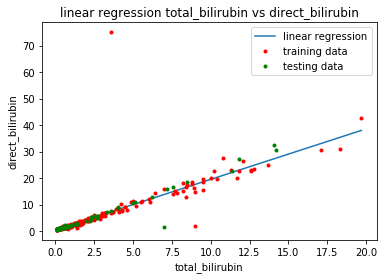

In [16]:
plt.xlabel('total_bilirubin')
plt.ylabel('direct_bilirubin')
plt.title('linear regression total_bilirubin vs direct_bilirubin')
x = np.linspace(min(X_train_db), max(X_train_db), 100)
y = (model.coef_*x + model.intercept_)
plt.plot(x,y)
plt.plot(X_train_db, y_train, 'r.')
plt.plot(X_test_db, y_test, 'g.')
plt.legend(['linear regression', 'training data', 'testing data'])
plt.show()

Построить одномерную полиномиальную регрессию на Direct_Bilirubin и Total_Bilirubin, используя тренировочные и тестовые данные из шага выше. Проверить точность предсказаний на тестовых данных. Получилось ли улучшить результат?

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train_db)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
pol_reg.score(poly_reg.fit_transform(X_test_db), y_test)

0.9396246797134126

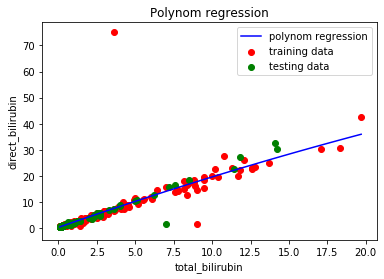

In [18]:
# The results are same with previous approach
def viz_polymonial():
    plt.scatter(X_train_db, y_train, c='red')
    plt.scatter(X_test_db, y_test, c='green')
    a = np.linspace(min(X_test_db), max(X_train_db), 100)
    b = pol_reg.predict(poly_reg.fit_transform(a))
    plt.plot(a, b, 'b')
    plt.title('Polynom regression')
    plt.xlabel('total_bilirubin')
    plt.ylabel('direct_bilirubin')
    plt.legend(['polynom regression', 'training data', 'testing data'])
    plt.show()
    return
viz_polymonial()

In [19]:
# I have played with linear regression with all parameters

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [21]:
# Quite better than polynom regression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9418448921407087

In [22]:
# # Построить многомерную **логистическую регрессию** для предсказания болезни (Dataset) от всех параметров, 
# предварительно разделив данные на 80% тренировочных и 20% тестовых. Сделать классификационный отчет 
# (куда включить количество найденных параметров true positive и false negative). Посмотреть какой получился результат.

In [23]:
x = data.drop('dataset', axis=1)
y = data.dataset

In [24]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.27, 
    random_state=27)

In [25]:
model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [26]:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.73      0.93      0.82       110
           2       0.56      0.21      0.30        48

    accuracy                           0.71       158
   macro avg       0.64      0.57      0.56       158
weighted avg       0.68      0.71      0.66       158



In [27]:
# Улучшить модель за счет уменьшения параметров, отобранных для обучения модели. Выбрать только те атрибуты, 
# которые коррелируют с таргет значением (атрибут Dataset) более 50% (нужно будет построить матрицу корреляций 
# и посмотреть в ней параметры, наиболее коррелирующие с Dataset атрибутом). 
# Проверить модель на тестовых данных, полученных выше. Построить классификационный отчет, 
# сделать сравнение двух моделей по этим классификационным отчетам.

In [28]:
# It seems that model don`t calculate F1-score therefore label-2 equal 0
x_train_2 = x_train[['total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase']]
x_test_2 = x_test[['total_bilirubin', 'direct_bilirubin', 'alkaline_phosphotase']]

In [29]:
model_2 = LogisticRegression(solver='liblinear').fit(x_train_2, y_train)

In [30]:
from sklearn.metrics import classification_report

model_pred = model_2.predict(x_test_2)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82       110
           2       0.00      0.00      0.00        48

    accuracy                           0.70       158
   macro avg       0.35      0.50      0.41       158
weighted avg       0.48      0.70      0.57       158



C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


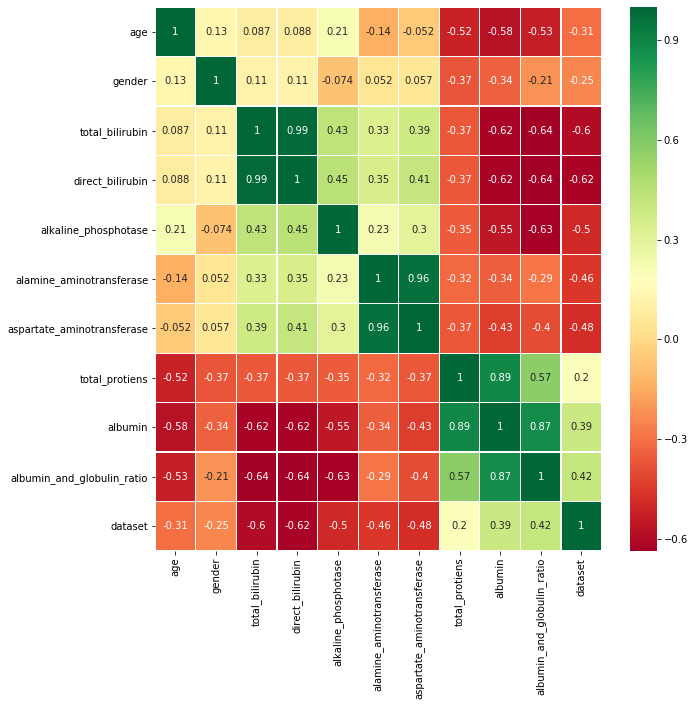

In [31]:
corr = data.corr()
corr = corr.round(2)
sns.heatmap(corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Посчитать квартили для всех колонок. 

In [32]:
data.quantile([0.25,0.5,0.75])

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0.25,33.0,1.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.94,1.0
0.75,58.0,1.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

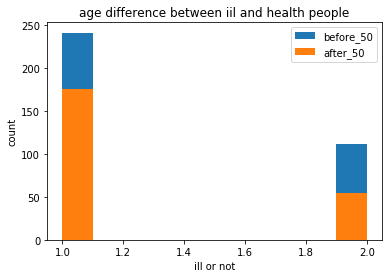

In [33]:
people_before_50 = data[data['age'] < 50]
people_after_50 = data[data['age'] >= 50]

plt.hist(people_before_50['dataset'])
plt.hist(people_after_50['dataset'])
plt.title('age difference between iil and health people')
plt.xlabel('ill or not')
plt.ylabel('count')
plt.legend(['before_50','after_50'])
plt.show()

In [34]:
# Nothing different
print(people_after_50.quantile([0.5]))
people_after_50.median(axis=0)

      age  gender  total_bilirubin  direct_bilirubin  alkaline_phosphotase  \
0.5  60.0     1.0              1.1               0.4                 214.5   

     alamine_aminotransferase  aspartate_aminotransferase  total_protiens  \
0.5                      33.0                        40.5             6.4   

     albumin  albumin_and_globulin_ratio  dataset  
0.5      3.0                       0.885      1.0  


age                            60.000
gender                          1.000
total_bilirubin                 1.100
direct_bilirubin                0.400
alkaline_phosphotase          214.500
alamine_aminotransferase       33.000
aspartate_aminotransferase     40.500
total_protiens                  6.400
albumin                         3.000
albumin_and_globulin_ratio      0.885
dataset                         1.000
dtype: float64

In [35]:
# Nothing different
print(people_before_50.quantile([0.5]))
people_before_50.median(axis=0)

      age  gender  total_bilirubin  direct_bilirubin  alkaline_phosphotase  \
0.5  35.0     1.0              0.9               0.3                 205.0   

     alamine_aminotransferase  aspartate_aminotransferase  total_protiens  \
0.5                      36.0                        42.0             6.7   

     albumin  albumin_and_globulin_ratio  dataset  
0.5      3.2                         1.0      1.0  


age                            35.0
gender                          1.0
total_bilirubin                 0.9
direct_bilirubin                0.3
alkaline_phosphotase          205.0
alamine_aminotransferase       36.0
aspartate_aminotransferase     42.0
total_protiens                  6.7
albumin                         3.2
albumin_and_globulin_ratio      1.0
dataset                         1.0
dtype: float64


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [58]:
# p_value equal 0.01%, it means that our sample is different with universe
ill = data[data['dataset']==1]['total_bilirubin']
stats.ttest_1samp(total_bilirubin, data['total_bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746645, pvalue=0.013871861207640133)

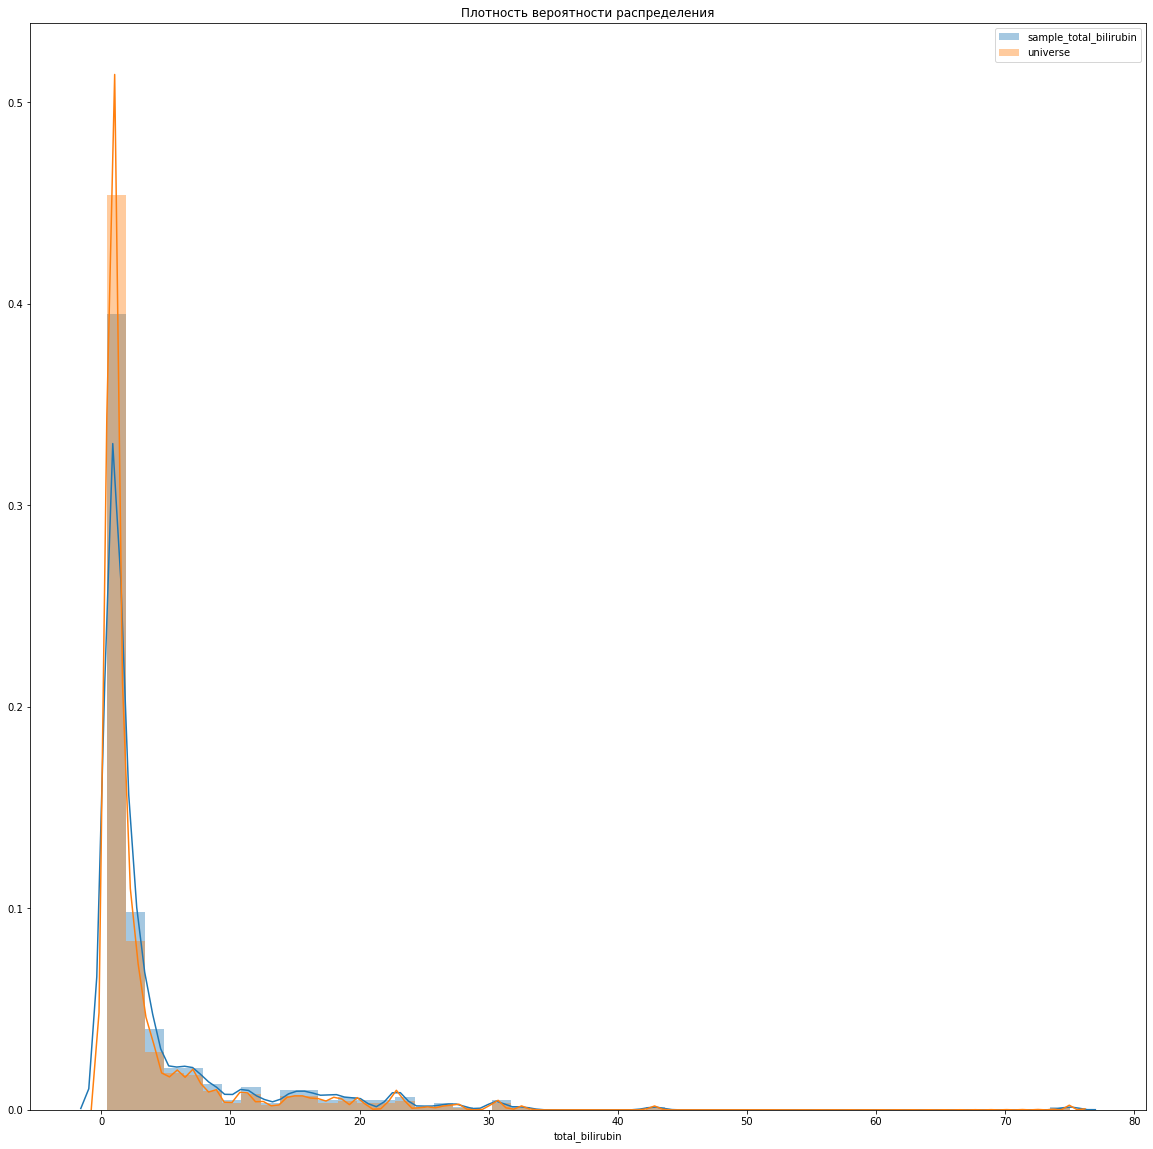

In [107]:
# Yustina, could you help me to understand, why p_value 0,13% and ou data is different but histogram shows that the same?
sample_total_bilirubin = data[data['dataset']==1]['total_bilirubin']
universe = data['total_bilirubin']
sns.distplot(sample_total_bilirubin)
sns.distplot(universe)
plt.title('Плотность вероятности распределения')
plt.legend(['sample_total_bilirubin', 'universe'])
plt.show()

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [99]:
# Its two different groups, p_values 7 e-08
ill = data[data['dataset']==1]['total_bilirubin']
health = data[data['dataset']==2]['total_bilirubin']
stats.ttest_ind(ill, health)

Ttest_indResult(statistic=5.441441126834864, pvalue=7.801430929364287e-08)

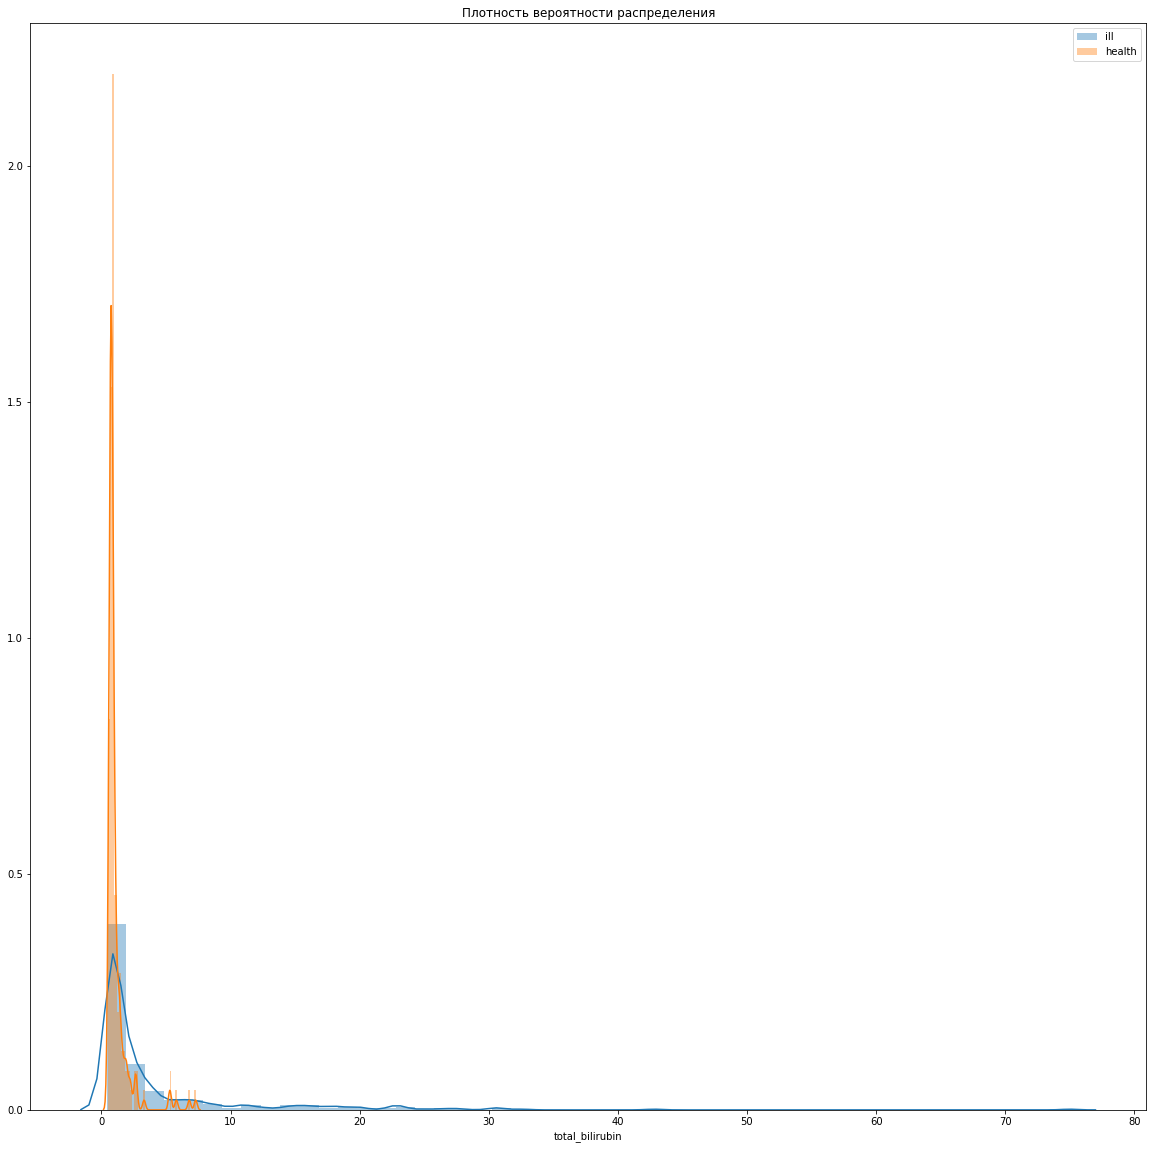

In [105]:
plt.rcParams['figure.figsize']=20,20
sns.distplot(ill)
sns.distplot(health)
plt.title('Плотность вероятности распределения')
plt.legend(['ill', 'health'])
plt.show()

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [129]:
#P_value almost equal 0, it means that we have three different samples, and we can`t accept H0 and we see that age very 
# significant influence for desease
group_1 = data[(data['age']==1) | (data['age']<30)]['dataset']
group_2 = data[(data['age']==30) | (data['age']<55)]['dataset']
group_3 = data[data['age']>55]['dataset']
stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=6.26808299955816, pvalue=0.0020094244035299166)

Вопросы задавать на почту yustiks@gmail.com